# Today's Date - 30 June 2023
# Topic - Data Augmentation

## Importing necessary libraries

In [1]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array

## Let's first use dat augmentation on 1 image

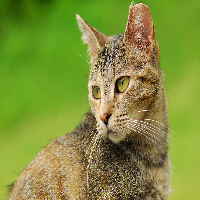

In [3]:
img = load_img('/content/test_cat.jpg', target_size=(200,200))
img

## Making a object called named 'datagen', which will generate augmented images


In [4]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

## Making image to array

In [5]:
img = img_to_array(img)

In [6]:
img.shape

(200, 200, 3)

## in the shape (1,200,200,3) : '1' represents number of images, and 200,200 represents pixels, 3 represents RGB

In [7]:
input_batch = img.reshape(1,200,200,3)

## saving the augmented images in a folder called 'augmented_images' in google collab

In [8]:
i=0
for output in datagen.flow(input_batch, batch_size=1, save_to_dir='augmented_images'):
  i=i+1
  if i==10:
    break

## Downloading the images

In [9]:
import zipfile
import os

# Specify the directory where augmented images are stored
output_dir = '/content/augmented_images'

# Create a zip file
zip_file_path = '/content/augmented_images.zip'
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
  # Iterate over files in the directory and add them to the zip file
  for root, _, files in os.walk(output_dir):
    for file in files:
      zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), output_dir))

# Download the zip file
from google.colab import files
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Displaying all the 10 images augmented

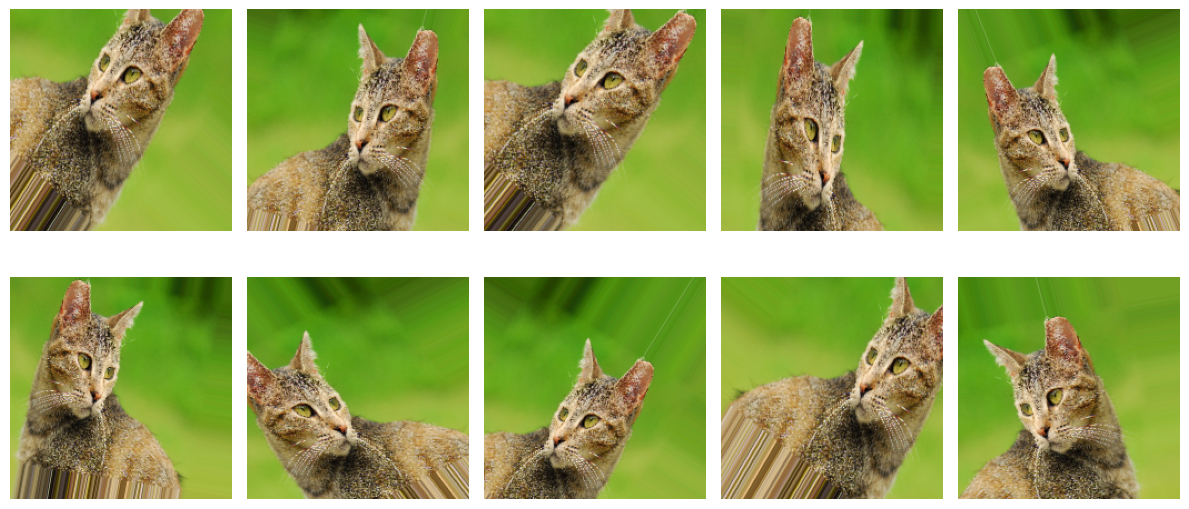

In [10]:
import matplotlib.pyplot as plt
import os

# Specify the directory where augmented images are stored
output_dir = '/content/augmented_images'

# Get the list of image file names
image_files = os.listdir(output_dir)

# Create a grid to display the images
num_rows = 2  # Number of rows in the grid
num_cols = 5  # Number of columns in the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Iterate over the image files and display them in the grid
for i, image_file in enumerate(image_files):
    # Load and display the image
    image_path = os.path.join(output_dir, image_file)
    img = plt.imread(image_path)
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(img)
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()


# To use Data Augmentation on LARGE NUMBER of photos, we dont save them, we directly train, shown in next code, where we will augment 2000 photos and train them

In [21]:
# # You can access your google drive files in google collab like this
# from google.colab import drive
# import os

# drive.mount('/content/drive')

# path = '/content/drive/MyDrive/yess'
# print(os.path.exists(path))

# drive.flush_and_unmount()